# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [1]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [2]:
# run this cell to upload file using GUI if you are using google colab

# from google.colab import files
# files.upload()

In [3]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
prices = pd.read_csv('/content/drive/MyDrive/NNDL - Lab : Question files and Dataset/prices dataset NNDL.csv')

In [6]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## Question 2

### Drop null
- Drop null values if any

In [7]:
prices.shape

(851264, 7)

In [8]:
prices.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [9]:
prices.shape

(851264, 7)

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [10]:
prices.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [11]:
prices.drop(['date', 'volume', 'symbol'], axis = 1, inplace = True)

## Question 3

### Print the dataframe
- print the modified dataframe

In [12]:
prices.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


In [13]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    851264 non-null  float64
 1   close   851264 non-null  float64
 2   low     851264 non-null  float64
 3   high    851264 non-null  float64
dtypes: float64(4)
memory usage: 26.0 MB


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [14]:
X = prices.drop('close', axis = 1)
y = prices['close']

## Question 4

### Create train and test sets
- Split the data into training and testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 3)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [17]:
import numpy as np

y_train = np.array(y_train)
y_test = np.array(y_test)
sc_X_train = sc_X_train.reshape(sc_X_train.shape[0], sc_X_train.shape[1], 1)
sc_X_test = sc_X_test.reshape(sc_X_test.shape[0], sc_X_test.shape[1], 1)

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Reshape, BatchNormalization

In [19]:
tf.keras.backend.clear_session

model = Sequential()
model.add(Flatten(input_shape = (3,)))
model.add(Dense(1, activation = 'linear', name = 'Output'))

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [20]:
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3)                 0         
_________________________________________________________________
Output (Dense)               (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [21]:
model.fit(sc_X_train, y_train, epochs = 50, batch_size = 128, validation_data=(sc_X_test, y_test))

Epoch 1/50
4988/4988 [==============================] - 6s 1ms/step - loss: 237.3492 - val_loss: 0.9469
Epoch 2/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9658 - val_loss: 0.9378
Epoch 3/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9540 - val_loss: 0.9304
Epoch 4/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9594 - val_loss: 0.9567
Epoch 5/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9728 - val_loss: 0.9212
Epoch 6/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9402 - val_loss: 0.9179
Epoch 7/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9207 - val_loss: 0.8987
Epoch 8/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9530 - val_loss: 0.8916
Epoch 9/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9055 - val_loss: 0.8918
Epoch 10/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [22]:
from sklearn.metrics import accuracy_score
scores = model.evaluate(sc_X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores*100))

Accuracy: 68.85%


In [23]:
model.evaluate(sc_X_test, y_test)

6651/6651 [==============================] - 5s 773us/step - loss: 0.6885


0.6884844303131104

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [24]:
input =  [123.430000, 122.30999, 116.250000]
input = np.array(input).reshape(-1,3)
input = sc.transform(input)

In [25]:
model.predict(input)

array([[119.784225]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [26]:
from tensorflow.keras.layers import Dropout, Reshape, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
(X_train_dnn, y_train_dnn), (X_test_dnn, y_test_dnn) = tf.keras.datasets.fashion_mnist.load_data()

### Change train and test labels into one-hot vectors

In [28]:
y_test_original = y_test_dnn

y_train_dnn = tf.keras.utils.to_categorical(y_train_dnn)
y_test_dnn = tf.keras.utils.to_categorical(y_test_dnn)

In [29]:
num_classes = y_train_dnn.shape[1]

In [30]:
num_classes

10

In [31]:
X_train_dnn = X_train_dnn.astype('float32')
X_test_dnn = X_test_dnn.astype('float32')
X_train_dnn = X_train_dnn / 255.0
X_test_dnn = X_test_dnn / 255.0

### Build the Graph

### Initialize model, reshape & normalize data

In [32]:
tf.keras.backend.clear_session

model = Sequential()

model.add(Reshape((784,), input_shape = (28,28,)))
model.add(BatchNormalization())

### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [33]:
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation = 'relu'))

model.add(Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

###Also add callback, such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [34]:
model.add(Dense(num_classes, activation = 'softmax', name = 'Output'))

model.compile(optimizer = 'adam', metrics = 'accuracy', loss = 'categorical_crossentropy')

early_stopping = EarlyStopping(monitor = 'val_loss', patience=2, restore_best_weights=True)

### Print model summary

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
____________________________________________

###Train your model, use test data as validation set

In [36]:
history = model.fit(X_train_dnn, y_train_dnn, validation_data = (X_test_dnn, y_test_dnn), epochs = 20, batch_size = 64, callbacks = early_stopping)

Epoch 1/20
938/938 [==============================] - 6s 6ms/step - loss: 0.6171 - accuracy: 0.7828 - val_loss: 0.3923 - val_accuracy: 0.8557
Epoch 2/20
938/938 [==============================] - 6s 6ms/step - loss: 0.3798 - accuracy: 0.8609 - val_loss: 0.3659 - val_accuracy: 0.8649
Epoch 3/20
938/938 [==============================] - 6s 6ms/step - loss: 0.3366 - accuracy: 0.8756 - val_loss: 0.3536 - val_accuracy: 0.8714
Epoch 4/20
938/938 [==============================] - 6s 6ms/step - loss: 0.3105 - accuracy: 0.8844 - val_loss: 0.3419 - val_accuracy: 0.8759
Epoch 5/20
938/938 [==============================] - 5s 6ms/step - loss: 0.2911 - accuracy: 0.8903 - val_loss: 0.3280 - val_accuracy: 0.8773
Epoch 6/20
938/938 [==============================] - 5s 6ms/step - loss: 0.2683 - accuracy: 0.8978 - val_loss: 0.3269 - val_accuracy: 0.8824
Epoch 7/20
938/938 [==============================] - 5s 6ms/step - loss: 0.2567 - accuracy: 0.9038 - val_loss: 0.3277 - val_accuracy: 0.8854
Epoch 

###Predict Labels

In [37]:
y_pred_dnn = np.argmax(model.predict(X_test_dnn), axis = -1)

In [38]:
y_test_dnn

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

###Print Confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
confusion_matrix(y_test_original, y_pred_dnn)

array([[843,   0,   9,  23,   2,   0, 114,   0,   9,   0],
       [  2, 968,   0,  22,   4,   0,   2,   0,   2,   0],
       [ 13,   2, 766,   9, 119,   1,  88,   0,   2,   0],
       [ 30,   7,   5, 879,  42,   1,  28,   0,   8,   0],
       [  1,   0,  81,  21, 846,   0,  49,   0,   2,   0],
       [  0,   0,   0,   0,   0, 979,   0,   9,   5,   7],
       [117,   1,  68,  25,  74,   0, 700,   0,  15,   0],
       [  0,   0,   0,   0,   0,  39,   0, 914,   4,  43],
       [  4,   0,   3,   3,   1,   1,   4,   2, 982,   0],
       [  0,   0,   0,   0,   0,  21,   1,  31,   0, 947]])

In [41]:
print(classification_report(y_test_original, y_pred_dnn))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.77      0.79      1000
           3       0.90      0.88      0.89      1000
           4       0.78      0.85      0.81      1000
           5       0.94      0.98      0.96      1000
           6       0.71      0.70      0.70      1000
           7       0.96      0.91      0.93      1000
           8       0.95      0.98      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



###Plot training accuracy vs validation accuracy
###Plot training loss vs validation loss

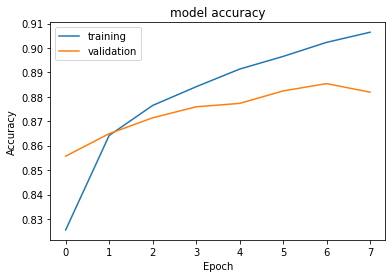

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

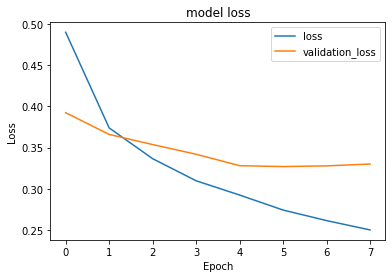

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'validation_loss'], loc='best')
plt.show()